# Feature Engineering

* Target Variable: Fraud Reported

* Numerical Feature: months_as_customer, age, policy_number,policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, capital-gains, capital loss, incident_hour_of_the_day, number_of_vehicles_involved, bodily_injuries, witnesses, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_year  

* Categorical Feature: policy_bind_date, policy_state, policy_csl, insured_sex , insured_education_level, insured_occupation, insured_hobbies, insured_relationship, incident_date, incident_type, collision_type, incident_severity ,authorities_contacted, incident_state, incident_city, tincident_location, property_damage, police_report_available, auto_make, auto_model, fraud_reported 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'insurance_claims_EDA.csv')

In [3]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [4]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported', 'age_bin', 'policy_annual_premium_bin',
       'capital-gains_bin', 'capital-loss_bin', 'incident_hour_of_the_day_bin',
       'total_claim_amount_bin', 'injury_claim_bin', 'property_claim_bin',
       'vehicle_claim_bin'],
      dtype='object')

* The Columns vehicle claim, injury claim and property claim are highly correlated with Total_claim. hence can be dropped
* The Column and and month_as_customer is also highly correlated. Hence we can drop age column.

In [5]:
# Drop the specified columns
columns_to_drop = [
    'injury_claim', 'property_claim', 'vehicle_claim','age',
    'age_bin', 'policy_annual_premium_bin', 'capital-gains_bin',
    'capital-loss_bin', 'incident_hour_of_the_day_bin',
    'total_claim_amount_bin', 'injury_claim_bin', 'property_claim_bin',
    'vehicle_claim_bin'
]

df = df.drop(columns_to_drop, axis=1)

In [6]:
df

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,1,YES,1,2,YES,71610,Saab,92x,2004,Y
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,1,NO,0,0,NO,5070,Mercedes,E400,2007,Y
2,134,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,2,3,NO,34650,Dodge,RAM,2007,N
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,NO,1,2,NO,63400,Chevrolet,Tahoe,2014,Y
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,0,1,NO,6500,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,YES,0,1,NO,87200,Honda,Accord,2006,N
996,285,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,1,YES,2,3,NO,108480,Volkswagen,Passat,2015,N
997,130,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,NO,2,3,YES,67500,Suburu,Impreza,1996,N
998,458,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,NO,0,1,YES,46980,Audi,A5,1998,N


In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le =LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,299,480,940,2,1,1,732,1,486,1,...,0,1,1,2,1,563,10,1,9,1
1,212,257,635,1,1,2,396,5,519,1,...,0,0,0,0,0,44,8,12,12,1
2,123,672,413,2,0,2,740,5,6,0,...,2,0,2,3,0,143,4,30,12,0
3,239,140,19,0,1,2,743,6,812,0,...,0,0,1,2,0,451,3,34,19,1
4,212,286,922,0,2,1,902,6,850,1,...,0,0,0,1,0,81,0,31,14,0


In [8]:
from sklearn.feature_selection import chi2
X = df.drop(columns = ['fraud_reported'], axis =1)
y = df['fraud_reported']
chi_scores = chi2(X, y)
chi_scores

(array([1.58086670e+01, 1.52379167e+02, 1.17127406e-01, 5.89272453e-01,
        9.40383398e-01, 3.89791272e-02, 3.83553499e+01, 6.43859677e+00,
        6.33756096e+02, 5.11837872e-01, 9.92123137e-02, 5.93073552e-03,
        7.25093249e+00, 5.17412489e-01, 6.25536201e+01, 2.96706653e+00,
        2.60145892e+01, 2.53002377e+00, 1.55344701e-01, 1.22804296e+02,
        2.27023703e+00, 3.78510795e+00, 2.29765975e+00, 1.30125690e+01,
        7.72213279e-02, 3.32167949e+00, 2.06533457e-01, 7.77356032e-01,
        2.03281026e+00, 5.28951079e-01, 2.54978312e+03, 1.88154130e+00,
        3.32040130e-03, 2.24937410e-01]),
 array([7.00807531e-005, 5.23548342e-035, 7.32171177e-001, 4.42700595e-001,
        3.32179261e-001, 8.43490020e-001, 5.89662143e-010, 1.11666821e-002,
        7.61918678e-140, 4.74344336e-001, 7.52776944e-001, 9.38614580e-001,
        7.08642033e-003, 4.71947532e-001, 2.59288257e-015, 8.49758157e-002,
        3.38847062e-007, 1.11698533e-001, 6.93479215e-001, 1.53904737e-028,
  

<Axes: >

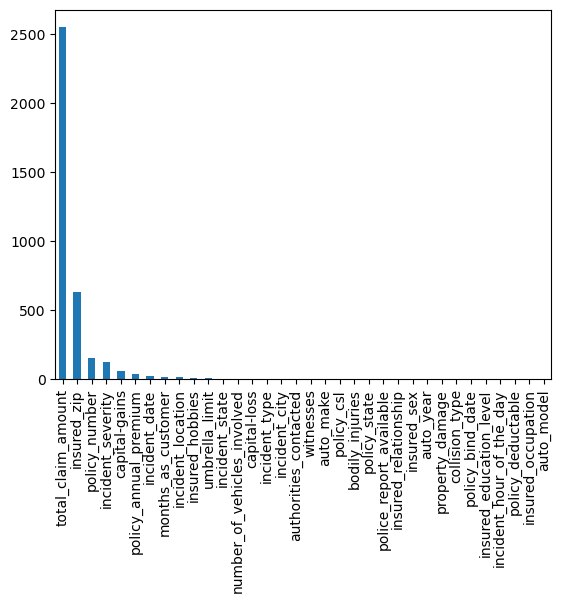

In [9]:
chi_values = pd.Series(chi_scores[0], index= X.columns)
chi_values.sort_values(ascending =False, inplace = True)
chi_values.plot.bar()

Feature importance by Random Forest
months_as_customer -> 0.0396115182826807
policy_number -> 0.04486957038881926
policy_bind_date -> 0.03637721540800335
policy_state -> 0.009296383366162154
policy_csl -> 0.009562731105331375
policy_deductable -> 0.008642068624167063
policy_annual_premium -> 0.03845844311047748
umbrella_limit -> 0.014592222501970084
insured_zip -> 0.0457216060230535
insured_sex -> 0.00606601987220936
insured_education_level -> 0.01957129917978266
insured_occupation -> 0.030023018193399448
insured_hobbies -> 0.07015991947684819
insured_relationship -> 0.0185193774555049
capital-gains -> 0.02408460122863425
capital-loss -> 0.02512164927818546
incident_date -> 0.04138291255641005
incident_type -> 0.007898007021240152
collision_type -> 0.008728928079736995
incident_severity -> 0.19760754808269662
authorities_contacted -> 0.013091230360631806
incident_state -> 0.018526609316277972
incident_city -> 0.020817996509911983
incident_location -> 0.04611278783160223
incident_hour_o

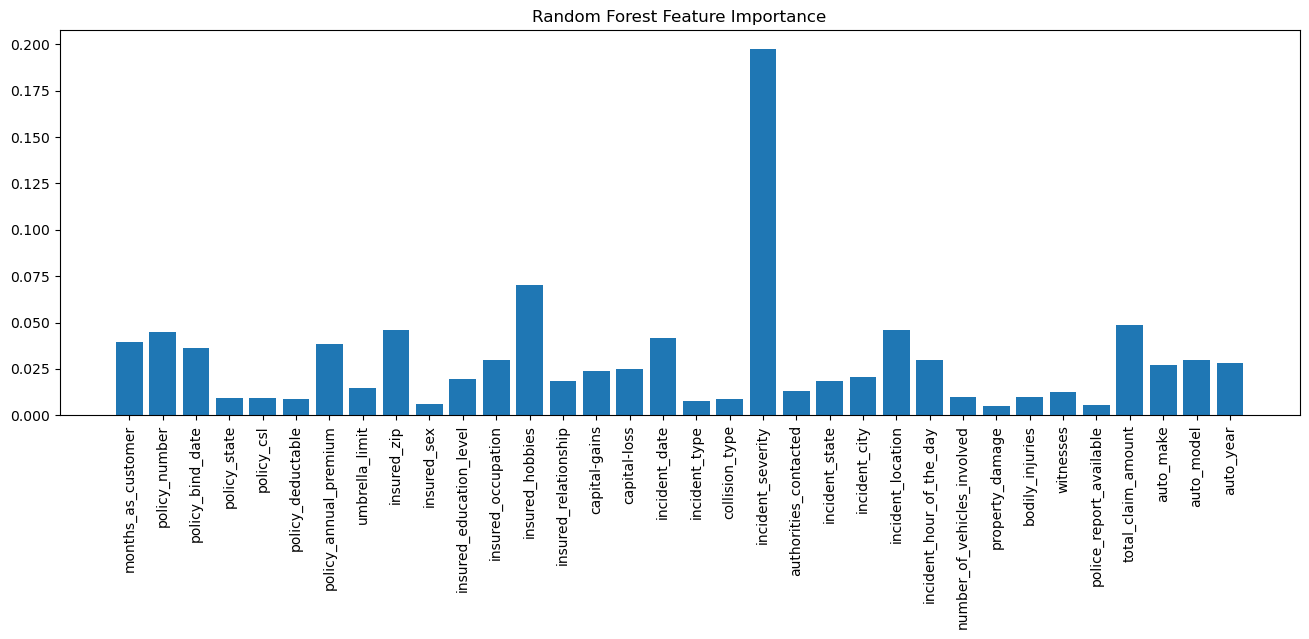

In [10]:
# Import necessary Libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#Initialize the Logistic Regression model
print("Feature importance by Random Forest")
RF = RandomForestClassifier()
RF.fit(X, y)
features = RF.feature_importances_
Columns = list(X.columns)

for i,j in enumerate(features):
    print(Columns[i], "->", j)
    
plt.figure(figsize =(16,5))
plt.title(label = "Random Forest Feature Importance")
plt.bar(range(len(features)), features)
plt.xticks(range(len(features)), Columns, rotation = 'vertical')
plt.show()

* Feature that have negligible impacts are: insured_sex, property_damage, police_report_available, bodily_injuries, policy_state, policy_csl, policy_deductable, incident_type, collision_type 

In [11]:
X = X.drop(['insured_sex', 'property_damage', 'police_report_available', 'bodily_injuries', 'policy_state', 'policy_csl', 'policy_deductable', 'incident_type', 'collision_type'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   months_as_customer           1000 non-null   int64
 1   policy_number                1000 non-null   int64
 2   policy_bind_date             1000 non-null   int64
 3   policy_annual_premium        1000 non-null   int64
 4   umbrella_limit               1000 non-null   int64
 5   insured_zip                  1000 non-null   int64
 6   insured_education_level      1000 non-null   int64
 7   insured_occupation           1000 non-null   int64
 8   insured_hobbies              1000 non-null   int64
 9   insured_relationship         1000 non-null   int64
 10  capital-gains                1000 non-null   int64
 11  capital-loss                 1000 non-null   int64
 12  incident_date                1000 non-null   int64
 13  incident_severity            1000 non-null   int6

# Model Development

### Train-Test Split

In [12]:
# import library
from sklearn.model_selection import train_test_split
# split the data into train, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 25), (300, 25), (700,), (300,))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
    model.fit(X_train, y_train)   
    pred_test = model.predict(X_test)
    print("Testing Accuracy_Score is", accuracy_score(pred_test, y_test) * 100)
    
    # K-Fold Stratified Cross Validation:
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    score = cross_val_score(model, X, y, cv=stratified_kfold)
    print("Accuracy using K-Fold Stratified Cross Validation is,", np.mean(score) * 100)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Logistic Regression

In [17]:
model = LogisticRegression()
classify(model, X, y)

Testing Accuracy_Score is 74.0
Accuracy using K-Fold Stratified Cross Validation is, 72.89999999999999


### DecisionTree

In [18]:
model = DecisionTreeClassifier()
classify(model, X, y)

Testing Accuracy_Score is 83.0
Accuracy using K-Fold Stratified Cross Validation is, 80.1


### Random Forest

In [19]:
model = RandomForestClassifier()
classify(model,X,y)

Testing Accuracy_Score is 78.0
Accuracy using K-Fold Stratified Cross Validation is, 79.10000000000001


### XGBoost

In [20]:
model = XGBClassifier()
classify(model,X,y)

Testing Accuracy_Score is 82.66666666666667
Accuracy using K-Fold Stratified Cross Validation is, 82.89999999999999


### AdaBoost

In [21]:
model = AdaBoostClassifier()
classify(model,X,y)

Testing Accuracy_Score is 80.0
Accuracy using K-Fold Stratified Cross Validation is, 78.3


### KNeighbors

In [22]:
model = KNeighborsClassifier(n_neighbors=20)
classify(model,X,y)

Testing Accuracy_Score is 73.33333333333333
Accuracy using K-Fold Stratified Cross Validation is, 75.1


### Naive Bayes

In [23]:
model = GaussianNB()
classify(model,X,y)

Testing Accuracy_Score is 75.0
Accuracy using K-Fold Stratified Cross Validation is, 76.2


### Support Vector Machine

In [24]:
model = svm.SVC(kernel='linear')
classify(model,X,y)

Testing Accuracy_Score is 74.33333333333333
Accuracy using K-Fold Stratified Cross Validation is, 77.39999999999999


### Confusion Matrix for the Best Model

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       241
           1       0.55      0.71      0.62        59

    accuracy                           0.83       300
   macro avg       0.73      0.78      0.75       300
weighted avg       0.85      0.83      0.83       300



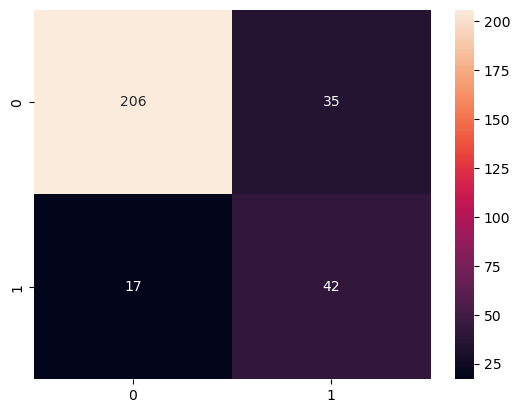

In [25]:
from sklearn.metrics import confusion_matrix
model = XGBClassifier()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm = confusion_matrix(pred_test, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')
# Classification Report
print(classification_report(pred_test,y_test))

### AUC ROC Curve

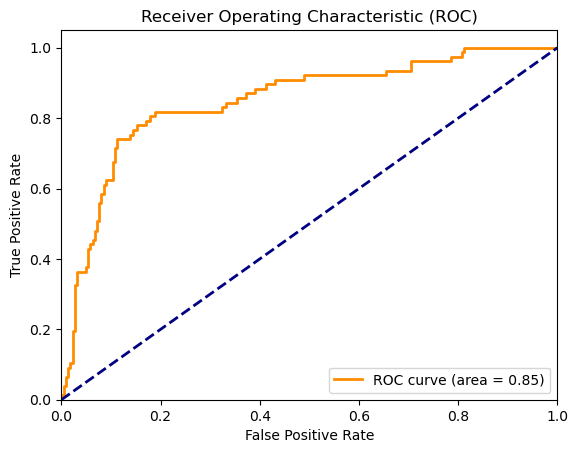

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Hyper Parameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
# Define the parameter grid for XGBoost
xgb_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an XGBClassifier instance
xgb_classifier = xgb.XGBClassifier()

# Create the RandomizedSearchCV instance
rs_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=xgb_grid, cv=5, n_iter=20, verbose=True)

# Fit the RandomizedSearchCV on your data
rs_xgb.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=True)

In [28]:
print(rs_xgb.best_score_)
print(rs_xgb.best_params_)

0.8489999999999999
{'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 1.0}


### Best Model Implementation

In [32]:
hyperparameters = {'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 1, 
                   'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 
                   'colsample_bytree': 1.0}

# Create an XGBClassifier instance
xgb_classifier = xgb.XGBClassifier(**hyperparameters)
xgb_classifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
import joblib
# Save the model
joblib.dump(xgb_classifier,"fraud_reported")

# Load the model
model = joblib.load('fraud_reported')